In [ ]:
%pip install ucimlrepo

In [268]:
import pandas as pd
import numpy as np
import math
import statistics
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier
from reader import feed
import time
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import logit
from sklearn.metrics import confusion_matrix
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.metrics import ConfusionMatrixDisplay
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
x = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

In [4]:
x.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [5]:
x = pd.get_dummies(x[['workclass','marital-status','occupation','relationship','race','sex','native-country','age',
                      'fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']])
x.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,2174,0,40,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,83311,13,0,0,13,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,215646,9,0,0,40,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,234721,7,0,0,40,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,338409,13,0,0,40,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [120]:
x['race'].value_counts()

race
White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: count, dtype: int64

In [179]:
y.head()

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K


In [180]:
y.value_counts()

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

In [117]:
X = x.drop('fnlwgt', axis=1)
Y = y[['income']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, 
                                                    random_state=42, 
                                                    stratify=Y)

regression = LogisticRegression(random_state=42).fit(X_train, Y_train.values.ravel())
Y_predicted = regression.predict(X_test)

Y_predicted

ValueError: Found input variables with inconsistent numbers of samples: [48842, 14653]

In [9]:
regression.score(X_test, Y_test)

0.5294478946290861

In [10]:
# 2 the fact of the matter is we are trying to predict a ninary outcome with linear regression as well as the fact that without 
# standardization of the data we are just going to end up with an iteration limit do to the size of the data we are working with

In [84]:
# 3 

def KNNbestchecker(NC: int):
    bestval=0
    for n in range(NC):
       
        knn = KNeighborsClassifier(n_neighbors=((2*n)+1)) 
        knn.fit(X_train, Y_train.values.ravel()) 
        tempval = knn.score(X_test, Y_test)
        if tempval>bestval:
            bestval=tempval
            bestKNN = n
        else:
            bestval=bestval
    print("The best number of neighbors is" , bestKNN*2+1)
    print("With a KNN score of" , bestval)
    knn = KNeighborsClassifier(n_neighbors=((bestKNN*2)+1))
    knn.fit(X_train, Y_train.values.ravel())
    Y_pred = knn.predict(X_test)
    print(Y_pred)
    print(type(Y_pred))

KNNbestchecker(15)

The best number of neighbors is 27
With a KNN score of 0.5609090288678087
['>50K' '<=50K' '<=50K' ... '<=50K' '<=50K' '<=50K']
<class 'numpy.ndarray'>


In [12]:
# 3 the KNN works better than the linear regression which is to bexpected but given the fact the data is not standarized in any way it's to be expected 
# that it performs worse than in the training data we did in class

In [13]:
# 4 

regression = LogisticRegression(random_state=42).fit(X_train, Y_train.values.ravel())
Y_predicted = regression.predict(X_test)

C:\Users\hamst\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
Y_predicted

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [15]:
regression.score(X_test, Y_test)

0.5294478946290861

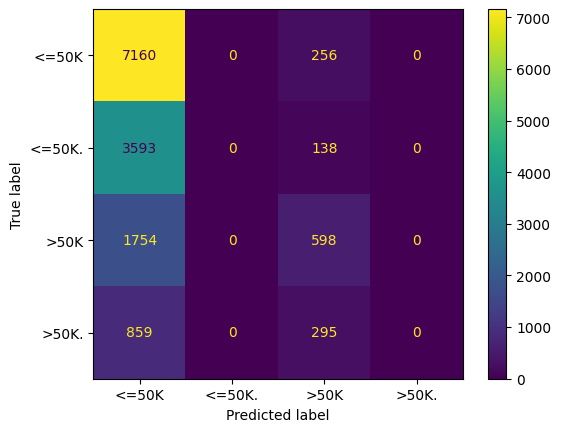

In [16]:
ConfusionMatrixDisplay.from_estimator(regression, X_test, Y_test)

In [17]:
def p_a_r(calc_type:str, tp: int, tn: int,
                        fp: int, fn: int) -> float:
    """
    This function produces precision or recall based on
    what is passed in
    """
    if calc_type == "p":
        value = tp / (tp + fp)
        return value
    elif calc_type == "r":
        value = tp / (tp + fn) 
        return value
    elif calc_type == "a":
        value = (tp+tn)/(tp+fp+tn+fn)
        return value
    else:
        error_msg = "something happened here. check your inputs"
        return error_msg

In [18]:
p_a_r("a", 593, 10753, 394, 2613)

0.7904967602591793

In [19]:
p_a_r("p", 593, 10753, 394, 2613)

0.6008105369807497

In [20]:
p_a_r("r", 593, 10753, 394, 2613)

0.18496568933250157

In [21]:
# 4 the data is formated in  weird way and the score is not quite better than the linear regression but that is likely due to how the differently 
# data is calculated I attempted for several hours to reformat the y data into a uniform method but doing so always made the rest of my code fail 
# in ways that i could not fix when i manually entered the data in a reformatted way getting rid of the trailing . the accuracy score was noticably
# improved although the precision was lackluster and the recall was terrible to the point of unusability

In [260]:
# 5 standardized data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


ValueError: could not convert string to float: 'Local-gov'

In [23]:
regression = LogisticRegression(random_state=42).fit(X_train, Y_train.values.ravel())
Y_predicted = regression.predict(X_test)

Y_predicted

array(['>50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [24]:
regression.score(X_test, Y_test)

0.5911417457176005

In [25]:
# the score for linear regression increased and it did not reach an iteration limit when the data was standardized

In [ ]:
KNNbestchecker(15)

In [ ]:
# when the data became standardized the optimal number of neighbors changed but the KNN score itself decreased slightly

In [ ]:
regression = LogisticRegression(random_state=42).fit(X_train, Y_train.values.ravel())
Y_predicted = regression.predict(X_test)

In [ ]:
Y_predicted

In [ ]:
regression.score(X_test, Y_test)

In [ ]:
ConfusionMatrixDisplay.from_estimator(regression, X_test, Y_test)

In [328]:
p_a_r("a", 2158, 10363, 784, 1348)

0.8545007848222207

In [330]:
p_a_r("p", 2158, 10363, 784, 1348)

0.7335146159075459

In [329]:
p_a_r("r", 2158, 10363, 784, 1348)

0.6155162578436966

In [331]:
# In logistic regression precision recall and accuracy all imporved when the data became standardized as well as the regression
# score itself and it ran faster and did not encounter an iteration limit error

In [ ]:
# home work 9 

In [277]:
# 1
# the y array data is made consistent and changed into a get dummies for faster process and overall just working as intended
y["income"]=np.where(y["income"]=="<=50K","49",
                                    np.where(y["income"]=="49","<=50K","50"))



In [278]:
X = x.drop('fnlwgt', axis=1)
Y = y['income']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, 
                                                    random_state=42, 
                                                    stratify=Y)

In [290]:
y.dtype()

AttributeError: 'DataFrame' object has no attribute 'dtype'

In [280]:
y.value_counts()

income
49        37155
50        11687
Name: count, dtype: int64

In [281]:
# 2
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

X_resampled, Y_resampled = ros.fit_resample(X_train, Y_train)

In [282]:
regression = LogisticRegression(random_state=42).fit(X_resampled, Y_resampled)
Y_predicted = regression.predict(X_test)

ValueError: could not convert string to float: 'Local-gov'

In [90]:
p_a_r("p", 2949, 8901, 2246, 557)

0.5676612127045236

In [91]:
p_a_r("a", 2949, 8901, 2246, 557)

0.808708114379308

In [92]:
p_a_r("r", 2949, 8901, 2246, 557)

0.8411294922989161

In [93]:
regression.score(X_test, Y_test)

0.4595645942810346

In [94]:
def KNNbestchecker2(NC: int):
    bestval=0
    for n in range(NC):
       
        knn = KNeighborsClassifier(n_neighbors=((2*n)+1)) 
        knn.fit(X_resampled, Y_resampled.values.ravel()) 
        tempval = knn.score(X_test, Y_test)
        if tempval>bestval:
            bestval=tempval
            bestKNN = n
        else:
            bestval=bestval
    print("The best number of neighbors is" , bestKNN*2+1)
    print("With a KNN score of" , bestval)
    knn = KNeighborsClassifier(n_neighbors=((bestKNN*2)+1))
    knn.fit(X_train, Y_train.values.ravel())
    Y_pred = knn.predict(X_test)
    print(Y_pred)
    print(type(Y_pred))

In [95]:
KNNbestchecker2(7)

The best number of neighbors is 1
With a KNN score of 0.4638640551422917
['>50K.' '<=50K.' '>50K.' ... '<=50K' '<=50K.' '>50K']
<class 'numpy.ndarray'>


In [ ]:
# resampling the data improved the logistical regression by a large margin on the recal statistic but decreased the KNN by a significant amount
# although that is unsuprising as that is unsuprising as we inflated the amount of minority data with oversampling and then did the neighbor check 
# so the statistics were infact overly inflated by design of oversampling
# i chose oversampling as logistic models work best when given more data and not less dataa like in under sampling as well as the fact oversampling
# generally perofrms better than undersampling due to the above reason.

In [106]:
# 3
from sklearn import metrics
from sklearn.svm import SVC

In [267]:

svc = SVC(random_state=42)
svc.fit(X_resampled, Y_resampled)

svc_disp = RocCurveDisplay.from_estimator(svc, X_test, Y_test)

ValueError: could not convert string to float: 'Local-gov'